In [1]:
!pip install -Uqq fastai

     |████████████████████████████████| 194kB 8.9MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 


In [2]:
from fastai.vision.all import untar_data, URLs

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
from fastai.vision.all import Path

In [5]:
Path, path

(pathlib.Path, Path('/root/.fastai/data/mnist_sample'))

In [6]:
Path.BASE_PATH = path

In [7]:
path.ls()

(#3) [Path('labels.csv'),Path('train'),Path('valid')]

In [8]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [9]:
# getting the paths into variables

threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

In [10]:
from fastai.vision.all import Image
# image is from python imaging library (PIL)
# this is how we load image from path

In [11]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [12]:
from fastai.vision.all import array

In [13]:
# converted to a Numpy array

array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [14]:
from fastai.vision.all import tensor

In [15]:
# converted to Pytorch tensor
tensor(im3)[4:10,4:10]

# same as before

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [16]:
import pandas as pd

In [17]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [18]:
len(im3_t[0])

# one row is 28

28

In [19]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

In [20]:
from fastai.vision.all import show_image

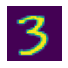

In [21]:
show_image(three_tensors[1])

In [22]:
import matplotlib

In [23]:
matplotlib.rc('image',cmap='Greys')

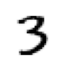

In [24]:
show_image(three_tensors[1])

In [25]:
import torch

In [26]:
torch.stack(seven_tensors)[0][15]

tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31,
        213, 254, 252, 252,  49,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       dtype=torch.uint8)

In [27]:
torch.stack(seven_tensors)[0][15]/255

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.1216, 0.8353, 0.9961, 0.9882, 0.9882,
        0.1922, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

In [28]:
# combining all images into a single three dimensional tensor rank-3
torch.stack(seven_tensors).float()[0][15]

tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  31., 213., 254., 252., 252.,  49.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.])

In [29]:
torch.stack(seven_tensors).float()[0][15]/255

#so .float() is actually not required

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.1216, 0.8353, 0.9961, 0.9882, 0.9882,
        0.1922, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

In [30]:
stacked_sevens = torch.stack(seven_tensors)/255
stacked_threes = torch.stack(three_tensors)/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [31]:
stacked_threes.ndim, len(stacked_threes.shape)

# both give you the rank

(3, 3)

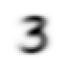

In [32]:
# we are calculating mean along the third dimension

mean3 = stacked_threes.mean(0)
show_image(mean3)

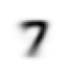

In [33]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

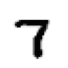

In [34]:
show_image(seven_tensors[0]/255)

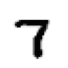

In [35]:
show_image(seven_tensors[0])

In [36]:
# comparing mean and non mean individual tensor
mean7[15], mean7[0]

(tensor([4.3816e-06, 0.0000e+00, 5.6836e-04, 3.7300e-03, 1.2270e-02, 2.9221e-02,
         5.1234e-02, 6.9077e-02, 7.5365e-02, 7.1040e-02, 6.0305e-02, 5.5971e-02,
         6.1929e-02, 1.0186e-01, 2.4922e-01, 5.2006e-01, 7.1947e-01, 7.1291e-01,
         5.1599e-01, 2.8805e-01, 1.3401e-01, 6.1220e-02, 2.9522e-02, 1.3213e-02,
         4.8686e-03, 9.5833e-04, 0.0000e+00, 0.0000e+00]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]))

In [37]:
torch.stack(seven_tensors)[0][15]/255, torch.stack(seven_tensors)[0][15]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.1216, 0.8353, 0.9961, 0.9882, 0.9882,
         0.1922, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000]),
 tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31,
         213, 254, 252, 252,  49,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        dtype=torch.uint8))

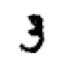

In [38]:
# determining the difference of ideal three to the three

a_3 = stacked_threes[0]
show_image(a_3)

In [39]:
(a_3 - mean3)[15]

tensor([ 0.0000e+00, -1.4456e-04, -7.1702e-04, -2.3385e-03, -6.0221e-03,
        -1.1625e-02, -1.9489e-02, -4.1298e-02, -9.1916e-02, -1.7655e-01,
        -2.7350e-01, -3.4554e-01, -9.1617e-02, -3.4511e-02, -3.9262e-02,
        -4.8867e-02,  4.6845e-01,  4.4916e-01,  1.1364e-01, -4.6004e-01,
        -2.9679e-01, -1.4911e-01, -6.0777e-02, -1.5610e-02, -1.8025e-03,
        -3.1981e-06, -1.3368e-04,  0.0000e+00])

In [40]:
((a_3 - mean3)**2)[15]

tensor([0.0000e+00, 2.0897e-08, 5.1412e-07, 5.4685e-06, 3.6266e-05, 1.3515e-04,
        3.7982e-04, 1.7055e-03, 8.4486e-03, 3.1171e-02, 7.4805e-02, 1.1940e-01,
        8.3937e-03, 1.1910e-03, 1.5415e-03, 2.3880e-03, 2.1945e-01, 2.0174e-01,
        1.2913e-02, 2.1163e-01, 8.8085e-02, 2.2235e-02, 3.6938e-03, 2.4368e-04,
        3.2489e-06, 1.0228e-11, 1.7871e-08, 0.0000e+00])

In [41]:
(a_3 - mean3).abs()[15]

tensor([0.0000e+00, 1.4456e-04, 7.1702e-04, 2.3385e-03, 6.0221e-03, 1.1625e-02,
        1.9489e-02, 4.1298e-02, 9.1916e-02, 1.7655e-01, 2.7350e-01, 3.4554e-01,
        9.1617e-02, 3.4511e-02, 3.9262e-02, 4.8867e-02, 4.6845e-01, 4.4916e-01,
        1.1364e-01, 4.6004e-01, 2.9679e-01, 1.4911e-01, 6.0777e-02, 1.5610e-02,
        1.8025e-03, 3.1981e-06, 1.3368e-04, 0.0000e+00])

In [42]:
(a_3-mean3).abs().shape

torch.Size([28, 28])

In [43]:
(a_3-mean3).abs().mean(0)

tensor([0.0000e+00, 9.1056e-05, 1.8667e-03, 9.9311e-03, 2.5490e-02, 4.6362e-02,
        6.8136e-02, 1.2514e-01, 1.3793e-01, 1.5160e-01, 1.5512e-01, 1.5906e-01,
        1.8649e-01, 2.1593e-01, 2.2719e-01, 2.5144e-01, 2.9355e-01, 2.7811e-01,
        1.7514e-01, 2.3283e-01, 1.5041e-01, 7.7075e-02, 3.0496e-02, 7.6713e-03,
        7.3203e-04, 1.9806e-05, 1.0074e-05, 0.0000e+00])

In [44]:
(a_3-mean3).abs().mean(0).mean(0)

tensor(0.1074)

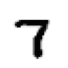

In [45]:
a_7 = stacked_sevens[0]
show_image(a_7)

In [46]:
dist_7_abs = (a_7 - mean7).abs().mean()
dist_7_sqr = ((a_7- mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1095), tensor(0.2196))

In [47]:
dist_3_abs = (a_3 - mean7).abs().mean()
dist_3_sqr = ((a_3- mean7)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1441), tensor(0.2780))

In [48]:
from fastai.vision.all import F

# it comes from torch.nn.functional

In [49]:
# pytorch.loss functions
F.l1_loss(a_7,mean7), F.mse_loss(a_7, mean7).sqrt()

(tensor(0.1095), tensor(0.2196))

why to use tensors than normal array because they are fast

Numpy and pytorch tensor vaies that that pytorch tenorshoud have same basic type for all basic arrays.

Pytorch structures aremade for GPU, and can automatically find derivatives.



In [50]:
data = [[1,2,3],[4,5,6]]
arr = array(data)
tns = tensor(data)


In [51]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [52]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [53]:
# creating a metric on validation set

valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [54]:
# metric L1
def mnist_distance(a,b):
  return (a-b).abs().mean((-1,-2))

In [55]:
mnist_distance(a_7, mean7)

tensor(0.1095)

In [56]:
valid_7_dist = mnist_distance(valid_7_tens, mean7)
valid_7_dist, valid_7_dist.shape

# it applied a-b through broadcasting


(tensor([0.0973, 0.0863, 0.1322,  ..., 0.1357, 0.1373, 0.1113]),
 torch.Size([1028]))

In [57]:
def is_7(x):
  return mnist_distance(x, mean7) < mnist_distance(x, mean3)

In [58]:
is_7(valid_3_tens) # broadcasting on all

tensor([False, False, False,  ..., False, False, False])

In [59]:
# Looking if any of the digits actually look like 3
false_7 = []
for i, isit in enumerate(is_7(valid_3_tens)):
  if(isit):
    false_7.append(i)

false_7
    
# a lot hmm lets see them

[11,
 12,
 29,
 35,
 56,
 63,
 69,
 70,
 108,
 119,
 136,
 138,
 148,
 164,
 166,
 176,
 182,
 195,
 197,
 213,
 219,
 235,
 249,
 264,
 293,
 296,
 299,
 315,
 327,
 349,
 355,
 386,
 387,
 395,
 423,
 424,
 425,
 428,
 429,
 438,
 443,
 466,
 475,
 476,
 507,
 510,
 531,
 536,
 548,
 576,
 592,
 604,
 609,
 620,
 645,
 672,
 706,
 712,
 732,
 735,
 738,
 740,
 749,
 751,
 771,
 778,
 794,
 815,
 833,
 835,
 845,
 856,
 876,
 883,
 884,
 909,
 910,
 926,
 938,
 959,
 967,
 975,
 989,
 999]

(84, 1010)

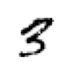

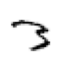

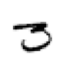

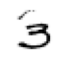

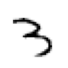

In [60]:
for i in false_7[5:10]:
  show_image(valid_3_tens[i])

#These all were wrongly classified as 7
# 84 out of 1010
len(false_7), len(valid_3_tens)

In [61]:
# mapping the accuracy
accuracy_3s = 1- is_7(valid_3_tens).float().mean()
accuracy_7s = is_7(valid_7_tens).float().mean()

accuracy_3s, accuracy_7s, (accuracy_3s+ accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [62]:
# using machine learning on simple function 

def f(x):
  return x**2

In [63]:
from fastai.vision.all import plt

In [64]:
# https://github.com/fastai/fastbook/blob/master/utils.py
# getting utils
# so you need to install fastbook for utils.

def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:23.)
  


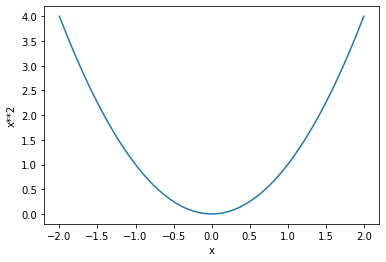

In [65]:
plot_function(f, 'x', 'x**2')

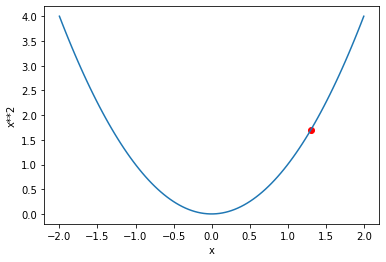

In [66]:
# we start by picking some random value for a parameter
plot_function(f,'x','x**2')
plt.scatter(1.3,f(1.3), color='red')

In [67]:
# we use requires_grad_() to tag a variable 
# with respect to which we need to find a derviatibe
xt = tensor(3.).requires_grad_()
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [68]:
yt.backward()
# to calculate the gradients

In [69]:
xt.grad

tensor(6.)

In [70]:
yt.grad

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  """Entry point for launching an IPython kernel.


In [71]:
xt = tensor(3.).requires_grad_()
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [72]:
zt = f(yt)

In [73]:
zt.backward()

In [74]:
xt.grad

# zt = f(f(xt)) 
# ((x)**2)**2
# x = 3.

# so in order to make it work we need to tag the leaf tensor 
# call backwards on the function 
# and the use the leaf tensor .grad to find the derivatives

tensor(108.)

In [75]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt


tensor([ 3.,  4., 10.], requires_grad=True)

In [76]:
yt = f(xt)

In [77]:
try:
  yt.backward()
except Exception as e:
  print(e)

grad can be implicitly created only for scalar outputs


In [78]:
def f(x): return (x**2).mean() # so that the function returns a scalar output

In [79]:
yt = f(xt)

In [80]:
yt.backward()

In [81]:
xt.grad

# gradient helps us fund th slope of our function
# not how far
# but if slope is very large then that may suggest we have more adjustments to do

tensor([2.0000, 2.6667, 6.6667])

In [82]:
# once we have the gradient then we pick a learning rate so at to adjust the weights beforeactual multiply
# end to end example

time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

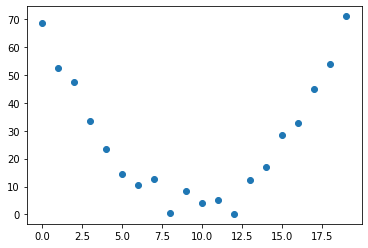

In [83]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

# these are the parameters we have to predict
plt.scatter(time, speed)

In [84]:
def f(t,params):
  a,b,c = params
  return a*(t**2) + (b*t) + c

# we assume a quadratic equation will fit the problem

In [85]:
def mse(preds, targets):
  return ((preds-targets)**2).mean()

# our loss function

In [86]:
# let us initialise the params 
# and tell Pytorch that we want to track them

params = torch.randn(3).requires_grad_()

In [87]:
orig_params = params.clone()

In [88]:
preds = f(time, params)

In [89]:
preds

tensor([-0.6685, -0.9565, -0.8711, -0.4121,  0.4202,  1.6261,  3.2054,  5.1582,
         7.4845, 10.1843, 13.2575, 16.7041, 20.5243, 24.7179, 29.2850, 34.2255,
        39.5395, 45.2270, 51.2879, 57.7223], grad_fn=<AddBackward0>)

In [90]:
from fastai.torch_core import to_np

In [91]:

to_np(preds)

array([-0.66853064, -0.95653725, -0.87107605, -0.412147  ,  0.42025   ,
        1.6261148 ,  3.2054474 ,  5.158248  ,  7.484517  , 10.184253  ,
       13.257457  , 16.704126  , 20.524267  , 24.717876  , 29.28495   ,
       34.225494  , 39.53951   , 45.226986  , 51.287933  , 57.722347  ],
      dtype=float32)

In [92]:
def show_preds(preds, ax=None):
  if ax is None: 
    ax= plt.subplots()[1]
    ax.scatter(time,speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)


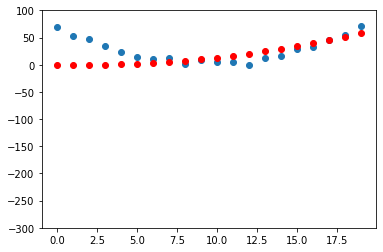

In [93]:
show_preds(preds)

In [94]:
loss = mse(preds, speed)
loss

tensor(661.6764, grad_fn=<MeanBackward0>)

In [95]:
loss.backward()
params.grad

tensor([588.4708,  25.8695, -18.5005])

In [96]:
params.grad * 1e-5

tensor([ 0.0059,  0.0003, -0.0002])

In [97]:
params

tensor([ 0.1867, -0.4747, -0.6685], requires_grad=True)

In [98]:
orig_params

tensor([ 0.1867, -0.4747, -0.6685], grad_fn=<CloneBackward>)

In [99]:
# changing the params
lr = 1e-5
params.data -= lr*params.grad.data
params.grad = None

In [100]:
params

# params changed

tensor([ 0.1808, -0.4750, -0.6683], requires_grad=True)

In [101]:
preds = f(time, params)
mse(preds, speed)

tensor(659.1827, grad_fn=<MeanBackward0>)

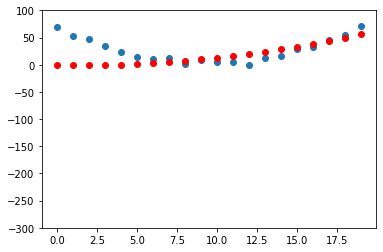

In [102]:
# lets see if it has imporoved
show_preds(preds)

In [103]:
#lets apply one more time

loss= mse(preds, speed)

In [104]:
loss.backward()

In [105]:
params.grad

tensor([256.4701,   4.5653, -19.9586])

In [106]:
lr = 1e-5
params.data -= lr * params.grad.data 
params.grad = None

In [107]:
params

tensor([ 0.1783, -0.4750, -0.6681], requires_grad=True)

In [108]:
preds = f(time, params)

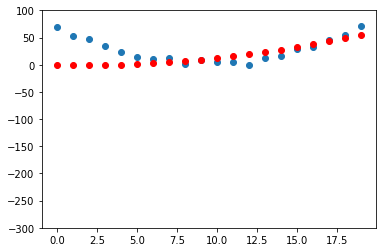

In [109]:
show_preds(preds)

In [110]:
lr =1e-5
  
for i in range(10):
  preds = f(time, params)
  loss = mse(preds, speed)
  print(loss.item())
  loss.backward()
  params.data -= params.grad.data * lr
  params.grad = None
  
print("preds : ", preds)

658.7061767578125
658.6112060546875
658.588623046875
658.5794677734375
658.5731201171875
658.567138671875
658.561279296875
658.5552978515625
658.5494995117188
658.5436401367188
preds :  tensor([-0.6663, -0.9641, -0.9095, -0.5024,  0.2572,  1.3692,  2.8338,  4.6508,
         6.8203,  9.3423, 12.2168, 15.4437, 19.0231, 22.9551, 27.2395, 31.8763,
        36.8657, 42.2075, 47.9019, 53.9487], grad_fn=<AddBackward0>)


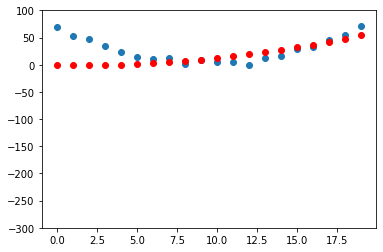

In [111]:
show_preds(preds)

# its close yer not much improvement has happend over time 

658.5377807617188
658.531982421875
658.5261840820312
658.5203247070312
658.5144653320312
658.5086669921875
658.5028076171875
658.4969482421875
658.4911499023438
658.4852294921875
preds :  tensor([-0.6642, -0.9609, -0.9054, -0.4975,  0.2626,  1.3751,  2.8399,  4.6569,
         6.8263,  9.3481, 12.2221, 15.4484, 19.0270, 22.9580, 27.2412, 31.8768,
        36.8647, 42.2048, 47.8973, 53.9421], grad_fn=<AddBackward0>)


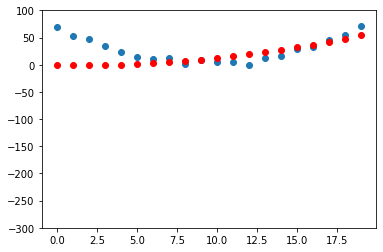

In [112]:
for i in range(10):
  preds = f(time, params)
  loss = mse(preds, speed)
  print(loss.item())
  loss.backward()
  params.data -= params.grad.data * lr
  params.grad = None
  
print("preds : ", preds)
show_preds(preds)

658.4794311523438
658.4735717773438
658.4678344726562
658.4619750976562
658.4559936523438
658.4503173828125
658.4444580078125
658.4385986328125
658.4328002929688
658.4269409179688
preds :  tensor([-0.6642, -0.9609, -0.9054, -0.4975,  0.2626,  1.3751,  2.8399,  4.6569,
         6.8263,  9.3481, 12.2221, 15.4484, 19.0270, 22.9580, 27.2412, 31.8768,
        36.8647, 42.2048, 47.8973, 53.9421], grad_fn=<AddBackward0>)


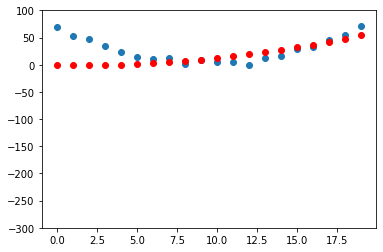

In [113]:
def run_ten(n, prn=True):
  for i in range(n):
    preds = f(time, params)
    loss = mse(preds, speed)
    if prn:
      print(loss.item())
    loss.backward()
    params.data -= params.grad.data * lr
    params.grad = None

run_ten(10)
print("preds : ", preds)
show_preds(preds)

658.421142578125
658.415283203125
658.4095458984375
658.4036865234375
658.3977661132812
658.3919677734375
658.38623046875
658.38037109375
658.3744506835938
658.3687744140625
658.3629150390625
658.3570556640625
658.3512573242188
658.3453979492188
658.3396606445312
658.3338012695312
658.3280029296875
658.3221435546875
658.3163452148438
658.3104858398438
658.3047485351562
658.298828125
658.2931518554688
658.2872924804688
658.2814331054688
658.2756958007812
658.2698974609375
658.2640991210938
658.2581787109375
658.2523193359375
658.2467041015625
658.2408447265625
658.2349853515625
658.2291870117188
658.2235107421875
658.2176513671875
658.2117309570312
658.2060546875
658.2002563476562
658.1945190429688
658.1886596679688
658.182861328125
658.1770629882812
658.1712036132812
658.1654052734375
658.1596069335938
658.1538696289062
658.1481323242188
658.142333984375
658.1365356445312
658.1307373046875
658.125
658.119140625
658.1134033203125
658.1075439453125
658.101806640625
658.0960083007812
658.

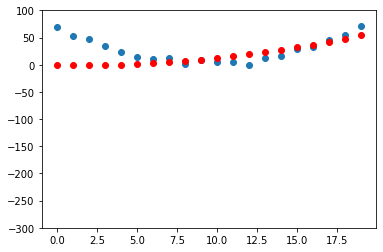

In [114]:
run_ten(100)
show_preds(preds)

Streaming output truncated to the last 5000 lines.
401.4014587402344
401.3993835449219
401.3973693847656
401.3953552246094
401.3932800292969
401.39129638671875
401.3892822265625
401.3872375488281
401.38519287109375
401.3831787109375
401.38116455078125
401.379150390625
401.37713623046875
401.3750915527344
401.373046875
401.3710632324219
401.36907958984375
401.3669738769531
401.364990234375
401.36297607421875
401.3609313964844
401.3589172363281
401.3568420410156
401.3548583984375
401.35284423828125
401.35076904296875
401.3487548828125
401.34674072265625
401.3446960449219
401.3426818847656
401.3406982421875
401.3386535644531
401.3366394042969
401.3345642089844
401.3325500488281
401.33050537109375
401.3285217285156
401.32647705078125
401.32440185546875
401.3224182128906
401.3204040527344
401.318359375
401.31634521484375
401.3143310546875
401.3122863769531
401.3102722167969
401.3081970214844
401.30621337890625
401.30426025390625
401.30218505859375
401.3001403808594
401.29815673828125
401.29

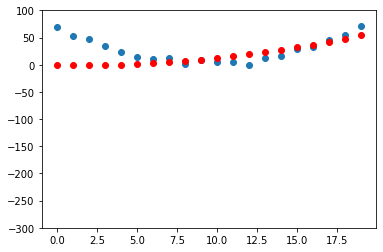

In [115]:
# over 100 iterations and we are not moving below the loss value of 634.

run_ten(100000)
show_preds(preds)

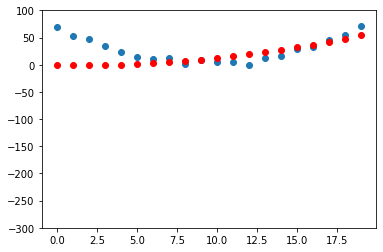

In [116]:
show_preds(preds)

In [117]:
#if you want to feed the original params back into params
params = orig_params.detach().requires_grad_()

In [118]:
params

tensor([ 0.1867, -0.4747, -0.6685], requires_grad=True)

MNIST LOSS FUNCTION

In [119]:
# creating an MNIST loss function

train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1,28*28)
# view changes the tesnors shape

In [120]:
torch.cat([stacked_threes, stacked_sevens]).shape

torch.Size([12396, 28, 28])

In [121]:
len(train_x[0]), train_x.shape

(784, torch.Size([12396, 784]))

In [122]:
train_y = tensor([0]* len(threes) + [1] * len(sevens)).unsqueeze(1)

In [123]:
tensor([0] * len(threes) + [1] * len(sevens))

tensor([0, 0, 0,  ..., 1, 1, 1])

In [124]:
tensor([0] * len(threes) + [1] * len(sevens)).shape

torch.Size([12396])

In [125]:
tensor([0] * len(threes) + [1] * len(sevens)).unsqueeze(1)

tensor([[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]])

In [126]:
tensor([0] * len(threes) + [1] * len(sevens)).unsqueeze(1).shape

# unsqueeze gives you an extra dimension

torch.Size([12396, 1])

In [127]:
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [128]:
# in pytirch a dataset is required to return a tuple of (x,y) when indexed
# python provides a zip function

dset = list(zip(train_x, train_y))

In [129]:
dset[0][1]

# 0 for three and 1 for 7

tensor([0])

In [130]:
x,y = dset[0]

In [131]:
x.shape, y

(torch.Size([784]), tensor([0]))

In [132]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([0] * len(valid_3_tens) + [0] * len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [133]:
def init_params(size, std=1.0):
  return (torch.randn(size) * std).requires_grad_()

# returns a random tensor of given size with requires grad

In [134]:
(torch.randn((28*28,1)) * 1.0).shape,(torch.randn((28*28,1)) * 1.0).mean() 

(torch.Size([784, 1]), tensor(0.0243))

In [135]:
weights = init_params((28*28,1))

In [136]:
bias = init_params(1)

In [137]:
(train_x[0]*weights.T).sum() + bias


# this is preds for 1 layer multiplied by weight
# and then adding bias

tensor([21.5137], grad_fn=<AddBackward0>)

In [138]:
def linear1(xb):
  return xb@weights + bias

  # @ is matrix multiply

preds = linear1(train_x)
preds

tensor([[21.5137],
        [20.1253],
        [10.9149],
        ...,
        [ 2.9848],
        [ 4.2277],
        [ 8.6181]], grad_fn=<AddBackward0>)

In [139]:
preds[:5] 

tensor([[21.5137],
        [20.1253],
        [10.9149],
        [24.5555],
        [26.6843]], grad_fn=<SliceBackward>)

In [140]:
(preds[:5]>0.0).float()

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [141]:
(preds[:5]>0.0).float() == train_y[:5]

tensor([[False],
        [False],
        [False],
        [False],
        [False]])

In [142]:
corrects= (preds>0.0).float() == train_y
print(corrects)
print(len(corrects))


tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])
12396


In [143]:
# trying to change the weights inorder to find the accuracy improvements

weights[0] *= 1.0001

In [144]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

# wow there actually was  jump

0.391093909740448

In [145]:
weights[2] *= 1.002

preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean()

tensor(0.3911)

In [146]:
 # defining our loss function

 # we cannot use accuracy in case of images because in images the changes are pretty small
 # or that gradient is zero almost everywhere

 trgts = tensor([1,0,1])
 prds = tensor([0.9, 0.4,0.2])

In [147]:
def mnist_loss(predictions, targets):
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [148]:
torch.where(trgts==1, 1-prds, prds)

#torch.where(a,b,c). 
#This is the same as running the list comprehension [b[i] if a[i] else c[i] for i in range(len(a))]

tensor([0.1000, 0.4000, 0.8000])

In [149]:
mnist_loss(prds, trgts)

tensor(0.4333)

In [150]:
mnist_loss(tensor([0.9, 0.4,0.8]), trgts)

tensor(0.2333)

In [151]:
# here we have assumed that prediction is always 0 and 1
#this can be ensured by a sigmoid curve

def sigmoid(x):
  print(1/(1+torch.exp(-x)))
  return 1/(1+torch.exp(-x))

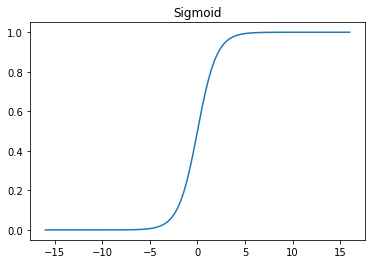

In [152]:
plot_function(torch.sigmoid, title='Sigmoid', min=-16, max=16)

In [153]:
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions,predictions).mean()

In [154]:
sigmoid(tensor([0.9, 0.4,0.8]))

tensor([0.7109, 0.5987, 0.6900])


tensor([0.7109, 0.5987, 0.6900])

In [155]:
sigmoid(tensor([4.]))

tensor([0.9820])


tensor([0.9820])

In [156]:
tensor([4.]).sigmoid()

# both the same

tensor([0.9820])

In [157]:
from fastai.vision.all import DataLoader

In [158]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 13,  1,  8,  5]),
 tensor([ 2, 14,  4,  7,  9]),
 tensor([11,  6,  0, 10, 12])]

In [159]:
dl

In [160]:
from fastai.vision.all import L

In [161]:
from fastai.vision.all import string

In [162]:
# we need  dataset which is essentially a collectionof independent and dependent variables

ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [163]:
# lets pass a dataset(i.e a collection of tuples with input and label) to dataloader 
# dataloader (i.e a class that makes it easier forus ot getmini batches)

dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([ 0, 23, 21,  2, 22, 12]), ('a', 'x', 'v', 'c', 'w', 'm')),
 (tensor([18, 11, 14, 19, 15, 13]), ('s', 'l', 'o', 't', 'p', 'n')),
 (tensor([20,  1,  9,  3, 24, 17]), ('u', 'b', 'j', 'd', 'y', 'r')),
 (tensor([ 6,  8, 16, 25,  7, 10]), ('g', 'i', 'q', 'z', 'h', 'k')),
 (tensor([4, 5]), ('e', 'f'))]

In [164]:
weights = init_params((28*28,1))
bias = init_params(1)

In [165]:
from fastai.vision.all import first

In [166]:
first(DataLoader(ds, batch_size=6, shuffle=True))

(tensor([25, 10,  1, 16, 13, 19]), ('z', 'k', 'b', 'q', 'n', 't'))

In [167]:
dl=DataLoader(dset, batch_size=256)
xb, yb = first(dl)
# gives you the first batch
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [168]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [169]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [170]:
preds = linear1(batch)
preds

tensor([[ 8.6682],
        [10.4111],
        [-4.9420],
        [12.6410]], grad_fn=<AddBackward0>)

In [171]:
loss =mnist_loss(preds, train_y[:4])
loss

tensor(0.7517, grad_fn=<MeanBackward0>)

In [172]:
loss.backward()
weights.grad.shape, weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(0.0003), tensor([0.0018]))

In [173]:
def calc_grad(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()

In [174]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(0.0005), tensor([0.0036]))

In [175]:
#after every step we need to set the current gradients to 0 first
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [176]:
def train_epoch(model, lr, params,dl):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    # model is a function in this case linear1
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [177]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [ True],
        [False]])

In [178]:
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()

In [179]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.2500)

In [180]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
  return round(torch.stack(accs).mean().item(),4)

In [181]:
validate_epoch(linear1)

0.1284

In [182]:
lr = 1.
params = weights, bias
train_epoch(linear1, lr, params,dl)
validate_epoch(linear1)

0.1554

In [183]:
for i in range(20):
  train_epoch(linear1, lr, params, dl)
  print(validate_epoch(linear1), end=' ')

0.3609 0.4224 0.4434 0.463 0.4684 0.4737 0.4766 0.4786 0.4796 0.4815 0.4825 0.484 0.4845 0.4849 0.4859 0.4874 0.4879 0.4884 0.4884 0.4884 

Trying to create a data loader once again.

In [184]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [185]:
train_y = tensor([0]*len(threes) + [1] * len(sevens)).unsqueeze(1)

In [186]:
train_y[:5] # it needs to be 2d tensor

tensor([[0],
        [0],
        [0],
        [0],
        [0]])

In [187]:
dset = list(zip(train_x, train_y))

In [188]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1,28*28)
valid_y = tensor([0]*len(valid_3_tens) + [1]*len(valid_7_tens)).unsqueeze(1)
valid_dset =list(zip(valid_x, valid_y))

In [189]:
def init_params(size, std=1.0):
  return (torch.randn(size)*std).requires_grad_()

weight = init_params((28*28,1))
bias = init_params(1)

In [190]:
bias
# just one for one image

tensor([-0.8501], requires_grad=True)

In [191]:
(train_x[0] * weight.T).sum() + bias

tensor([3.0388], grad_fn=<AddBackward0>)

In [192]:
# our model

def linear1(xb):
  return xb@weight + bias

In [193]:
preds = linear1(train_x)

In [194]:
preds[:5]

tensor([[ 3.0388],
        [ 6.7326],
        [ 1.3033],
        [16.8423],
        [ 2.0410]], grad_fn=<SliceBackward>)

In [195]:
# checking if the prediction is correct
corrects = (preds>0.0).float() == train_y
corrects[:5]

tensor([[False],
        [False],
        [False],
        [False],
        [False]])

In [196]:
corrects

# it is already printing everything correctly,how

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [197]:
# average accuracy

corrects.float().mean()

tensor(0.6292)

In [198]:
preds_valid = linear1(valid_x)

In [199]:
correct_valid = (preds_valid>0).float() == valid_y

correct_valid.float().mean()

# cool shit

tensor(0.6266)

In [200]:
# loss function

def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid() # ensures its always between 0 and 1
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [201]:
trgt = tensor([1,0,1])
preds = tensor([0.9,0.4,0.2])

In [202]:
mnist_loss(preds, trgt)

tensor(0.4460)

In [203]:
dl = DataLoader(dset, batch_size=256)
# dataloader for mini batches
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [204]:
valid_dl = DataLoader(valid_dset, batch_size=256)
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [205]:
def calc_grad(xb, yb, model):
  preds =model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()

In [206]:
def train_epoch(model, lr, params, dl=dl):
  for xb, yb in dl:
    calc_grad(xb, yb,model)
    for p in params:
      #print(p.grad)
      p.data -= p.grad*lr
      p.grad.zero_()

In [207]:
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()

In [208]:
batch_accuracy(linear1(train_x), train_y)

tensor(0.6292)

In [209]:
# total accuracy of model from validation set
def validate_epoch(model, valid_dl=valid_dl):
  accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
  return round(torch.stack(accs).mean().item(),4)

In [210]:
validate_epoch(linear1, valid_dl)

# it is same as before

0.6277

In [211]:
# lets train for 1 epoc and see if accuracy improves
lr =1.
params = weight, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.7519

In [212]:
for i in range(20):
  train_epoch(linear1, lr, params)
  print(validate_epoch(linear1), end=' ')

# the pattern is strange though

0.893 0.9286 0.9477 0.9555 0.957 0.9599 0.9618 0.9623 0.9638 0.9657 0.9667 0.9672 0.9692 0.9702 0.9702 0.9702 0.9711 0.9716 0.9716 0.9726 

In [213]:
from fastai.vision.all import nn

In [214]:
# we need to create an optimiser
# this will handle the SGD step for us

## nn.linear does the same thing as init_params and linear together

linear_model = nn.Linear(28*28,1)
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [215]:
# creating an optimiser class

class BasicOptim:
  def __init__(self, params, lr):
    self.params, self.lr = list(params),lr
  
  def step(self, *args, **kwargs):
    for p in self.params:
      p.data -= p.grad.data * self.lr
  
  def zero_grad(self, *args, **kwargs):
    for p in self.params:
      p.grad = None

In [216]:
opt = BasicOptim(linear_model.parameters(), lr)

In [217]:
# simplified training loop
def train_epoch(model):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    opt.step()
    opt.zero_grad()

In [218]:
validate_epoch(linear_model)

0.351

In [219]:
def train_model(model, epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end = ' ')

In [220]:
train_model(linear_model, 20)

0.4932 0.812 0.8423 0.9126 0.9346 0.9482 0.9565 0.9624 0.9658 0.9668 0.9692 0.9721 0.9746 0.9746 0.9761 0.977 0.9775 0.978 0.978 0.9785 

In [221]:
from fastai.vision.all import SGD

In [222]:
# Basic optimisation can be done by SGD

linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(),lr)
train_model(linear_model, 20)

0.4932 0.8179 0.8467 0.914 0.9331 0.9482 0.9555 0.9638 0.9663 0.9678 0.9702 0.9717 0.9736 0.9746 0.9756 0.977 0.9775 0.9775 0.9785 0.9785 

In [223]:
from fastai.vision.all import DataLoaders

# given by fastai

In [224]:
# also learner.fit function is there 
# instead of train_model

dls = DataLoaders(dl, valid_dl)

In [225]:
from fastai.vision.all import Learner

In [226]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [227]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636240,0.503706,0.495584,00:00
1,0.629645,0.439184,0.495584,00:00
2,0.237120,0.329302,0.658979,00:00
3,0.102323,0.146511,0.870952,00:00
4,0.051870,0.094685,0.919038,00:00
5,0.032265,0.071752,0.938175,00:00
6,0.024184,0.058708,0.951423,00:00
7,0.020624,0.050401,0.956820,00:00
8,0.018875,0.044761,0.964181,00:00
9,0.017871,0.040715,0.965653,00:00


In [228]:
# replacing linear network with a neural network

def simple_net(xb):
  res = xb@w1 +b1
  res = res.max(tensor(0.0))
  res = res@w2 + b2
  return res

In [229]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

In [230]:
batch = train_x[:4]

In [231]:
batch@w1 + b1

tensor([[  6.0530,  -3.9959,  -8.3862,   3.0164,  -4.7681,  18.9494, -10.1205,
         -12.0606,  21.0993,  -2.4361,   4.9763,   0.4834, -12.6450,   5.6547,
          -1.4482,  -6.7761,   6.9677,  11.7690,   9.0448, -22.4082,  -6.2205,
           9.8017,  -2.3835,  -6.8834,   0.9278,  -7.7062,   8.5112,  -8.4190,
          -5.6111,   5.6001],
        [  7.2357,   3.5014, -12.0169,   0.3540,  -9.9059,  18.7359,  -4.1710,
          -3.6084,  16.6124,   1.3146,   4.5148,   4.4567,  -9.6998,   5.1056,
          10.7122,  -0.8163,   2.1887,   6.0516,   1.2753, -27.6143,  -7.8358,
           3.2067,   7.8784,  -7.5244,   2.4783,  -8.2420,   5.4893,  -4.6035,
          -6.0203,  17.6173],
        [  3.0330,   6.3926,   1.1457,   3.6655,  -7.8650,  13.3932,  -3.1068,
           1.7706,  22.2711,   4.7247,   0.7332,   6.4307,  -4.4750,   0.4154,
           2.1858, -13.5359,   0.3127,   7.8165,  10.4410, -19.1528,  -8.1200,
          11.4715,  -1.9683,  -8.6652,  11.6324,  -1.5499,   3.0173,  -

In [232]:
(batch@w1 + b1).max(tensor(2.0)) # tensor(2.0 seems to clams the min value)

tensor([[ 6.0530,  2.0000,  2.0000,  3.0164,  2.0000, 18.9494,  2.0000,  2.0000,
         21.0993,  2.0000,  4.9763,  2.0000,  2.0000,  5.6547,  2.0000,  2.0000,
          6.9677, 11.7690,  9.0448,  2.0000,  2.0000,  9.8017,  2.0000,  2.0000,
          2.0000,  2.0000,  8.5112,  2.0000,  2.0000,  5.6001],
        [ 7.2357,  3.5014,  2.0000,  2.0000,  2.0000, 18.7359,  2.0000,  2.0000,
         16.6124,  2.0000,  4.5148,  4.4567,  2.0000,  5.1056, 10.7122,  2.0000,
          2.1887,  6.0516,  2.0000,  2.0000,  2.0000,  3.2067,  7.8784,  2.0000,
          2.4783,  2.0000,  5.4893,  2.0000,  2.0000, 17.6173],
        [ 3.0330,  6.3926,  2.0000,  3.6655,  2.0000, 13.3932,  2.0000,  2.0000,
         22.2711,  4.7247,  2.0000,  6.4307,  2.0000,  2.0000,  2.1858,  2.0000,
          2.0000,  7.8165, 10.4410,  2.0000,  2.0000, 11.4715,  2.0000,  2.0000,
         11.6324,  2.0000,  3.0173,  2.0000,  2.0000,  5.3759],
        [ 4.2013,  4.7490,  2.0000,  7.3430,  2.0000, 21.1700,  2.0000,  2.0000

In [233]:
(batch@w1 + b1)@w2 + b2

tensor([[ 9.7324],
        [21.6441],
        [53.2299],
        [ 8.8018]], grad_fn=<AddBackward0>)

In [234]:
((batch@w1 + b1).max(tensor(0.0)))@w2 + b2

tensor([[-6.6039],
        [ 0.7430],
        [25.4589],
        [-8.3153]], grad_fn=<AddBackward0>)

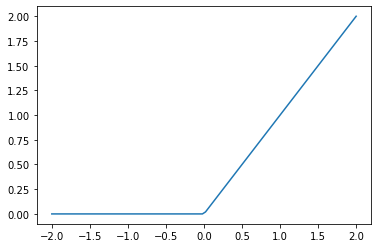

In [235]:
plot_function(F.relu)

In [236]:
# By "virtue" of universal approximation theram neural net can predict anything
# in pytorch

simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [237]:
learn = Learner(dls,simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [238]:
learn.fit(160,0.01)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.493409,0.477030,0.828754,00:00
1,0.467019,0.441915,0.847890,00:00
2,0.426267,0.389679,0.875859,00:00
3,0.368196,0.321162,0.908243,00:00
4,0.300754,0.251607,0.930815,00:00
5,0.238215,0.195206,0.946025,00:00
6,0.188574,0.155607,0.954858,00:00
7,0.152374,0.129027,0.959274,00:00
8,0.126846,0.110887,0.959764,00:00
9,0.108834,0.098064,0.960255,00:00


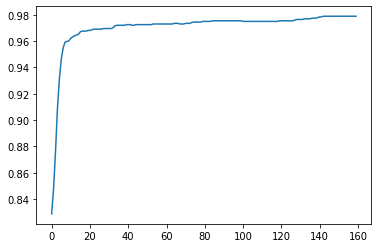

In [239]:
# learn.recorder is storing the output stored in values attribute

plt.plot(L(learn.recorder.values).itemgot(2))

# thsi is certainly quite strange !

In [240]:
learn.recorder.values[-1][2]

0.9789009094238281

In [241]:
# lets look at resnet 18 what it is using

from fastai.vision.all import resnet18

In [242]:
resnet18

<function torchvision.models.resnet.resnet18>

In [243]:
import dis

dis.dis(resnet18)

240           0 LOAD_GLOBAL              0 (_resnet)
              2 LOAD_CONST               1 ('resnet18')
              4 LOAD_GLOBAL              1 (BasicBlock)
              6 LOAD_CONST               2 (2)
              8 LOAD_CONST               2 (2)
             10 LOAD_CONST               2 (2)
             12 LOAD_CONST               2 (2)
             14 BUILD_LIST               4
             16 LOAD_FAST                0 (pretrained)
             18 LOAD_FAST                1 (progress)
             20 BUILD_TUPLE              5

241          22 LOAD_FAST                2 (kwargs)
             24 CALL_FUNCTION_EX         1
             26 RETURN_VALUE


In [244]:
import inspect
inspect.getsource(resnet18)

'def resnet18(pretrained=False, progress=True, **kwargs):\n    r"""ResNet-18 model from\n    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_\n\n    Args:\n        pretrained (bool): If True, returns a model pre-trained on ImageNet\n        progress (bool): If True, displays a progress bar of the download to stderr\n    """\n    return _resnet(\'resnet18\', BasicBlock, [2, 2, 2, 2], pretrained, progress,\n                   **kwargs)\n'

In [245]:
from fastai.vision.all import accuracy

In [246]:
from fastai.vision.all import cnn_learner

In [247]:
from fastai.vision.all import ImageDataLoaders

In [248]:
dls = ImageDataLoaders.from_folder(path)

In [249]:
learn = cnn_learner(dls, resnet18, opt_func=SGD, loss_func=F.cross_entropy, metrics=accuracy)


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [250]:
learn.fit(1,0.1)

# wow

epoch,train_loss,valid_loss,accuracy,time
0,0.063359,0.013708,0.995584,00:15


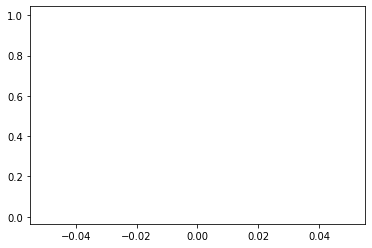

In [251]:
plt.plot(L(learn.recorder.values))

# nothing because one epoch ?

In [252]:
Image.open(im3_path)

In [253]:
num = range(20)

[2*x if x%2!=0 else x for x in num]

# [x+1 if x >= 45 else x+5 for x in l]

[0, 2, 2, 6, 4, 10, 6, 14, 8, 18, 10, 22, 12, 26, 14, 30, 16, 34, 18, 38]

In [254]:
new_array = tensor((torch.randn(1,1,9)*10))

In [255]:
new_array

tensor([[[ -1.7343,   9.3831,   7.2425,  14.3334,  16.5714,   5.8990, -11.4211,
          -12.1688,  -1.3206]]])

In [256]:
new_array.shape

torch.Size([1, 1, 9])

In [257]:
(new_array*2)[0][0][-4:]

tensor([ 11.7981, -22.8421, -24.3377,  -2.6412])

In [259]:
def a(arg1, arg2):
  return list(zip(arg1,arg2))

a([1,2,3,4],['a','b','c','d'])

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

In [263]:
def train_model_1(n, xb, yb, model, weight):
  for i in range(n):
    pred = model(xb)
    pred = pred.sigmoid()
    loss = (pred - yb).mean()
    loss.backward()
    lr = 0.1
    weight.data -= weight.grad * lr
    weight.data.zero_()

In [264]:
train_model_1(4, train_x, train_y, linear1, weight)

tensor([1., 2., 0., 4.])


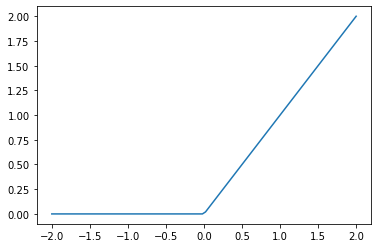

In [277]:
def relu_mine(a):
  return a.max(tensor(0.0))

print(relu_mine(tensor([1,2,-3,4])))


plot_function(relu_mine, min=-2, max=2)

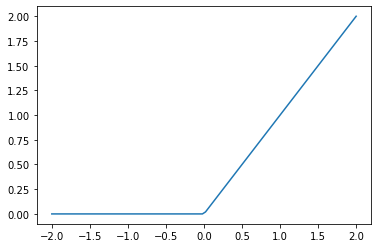

In [278]:
plot_function(F.relu)

x and y must have same first dimension, but have shapes torch.Size([100]) and (1,)


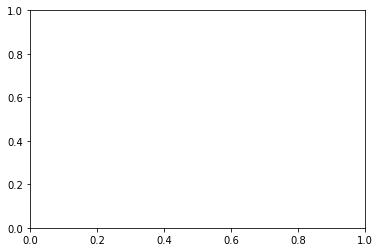

In [282]:
try:
  plot_function(nn.ReLU)
except Exception as e:
  print(e)